Kütüphaneleri **import** ettik.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


**flights** isimli csv dosyasından veriyi çektik.

In [3]:
df = pd.read_csv('/kaggle/input/flights/flights.csv')

sütunlara ait verilerin formatlarını inceledik.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

İlk 5 satırın verilerini önizleme yaptık.

In [5]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


***time_hour*** isimli sütundaki veriler tarih olduğu için **Object** veri tipini ***date_time*** formatına dönüştürdük.

In [6]:
df['time_hour'] = pd.to_datetime(df['time_hour'])


In [7]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [8]:
# Zaman sütunlarını datetime'a çevir
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Haftanın günü (0 = Pazartesi, 6 = Pazar)
df['day_of_week'] = df['date'].dt.dayofweek

# Hafta sonu mu? (Cumartesi & Pazar)
df['weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Ayların döngüsel dönüşümü (Mevsimsellik için)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Kalkış saati bilgisi (sched_dep_time float/int, örn: 540 → 5:40)
df['sched_dep_hour'] = df['sched_dep_time'] // 100
df['sched_dep_minute'] = df['sched_dep_time'] % 100


In [9]:
# Ortalama hız (mil/saat) → distance / air_time * 60
df['avg_speed'] = (df['distance'] / df['air_time']) * 60


In [10]:
# Uçuş yönü (örneğin 'JFK_MIA')
df['route'] = df['origin'] + "_" + df['dest']


In [11]:
# Taşıyıcı bazında ortalama kalkış gecikmesi
carrier_delay_mean = df.groupby('carrier')['dep_delay'].mean().to_dict()
df['carrier_avg_delay'] = df['carrier'].map(carrier_delay_mean)


Son 5 satıra ait verileri önizledim.

In [12]:
df.tail()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,date,day_of_week,weekend,month_sin,month_cos,sched_dep_hour,sched_dep_minute,avg_speed,route,carrier_avg_delay
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,14,55,NaN,JFK_DCA,16.725769
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,22,0,NaN,LGA_SYR,16.725769
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,12,10,NaN,LGA_BNA,10.552041
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,11,59,NaN,LGA_CLE,10.552041
336775,336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,8,40,NaN,LGA_RDU,10.552041


Her sütunda ne kadar boş veri sayısı var gözlemledik.

In [13]:
df.isnull().sum()

id                      0
year                    0
month                   0
day                     0
dep_time             8255
sched_dep_time          0
dep_delay            8255
arr_time             8713
sched_arr_time          0
arr_delay            9430
carrier                 0
flight                  0
tailnum              2512
origin                  0
dest                    0
air_time             9430
distance                0
hour                    0
minute                  0
time_hour               0
name                    0
date                    0
day_of_week             0
weekend                 0
month_sin               0
month_cos               0
sched_dep_hour          0
sched_dep_minute        0
avg_speed            9430
route                   0
carrier_avg_delay       0
dtype: int64

her sütunda ne kadar boş veri var sayısını görmek için isnull kullanıldı.

In [14]:
df.tail()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,date,day_of_week,weekend,month_sin,month_cos,sched_dep_hour,sched_dep_minute,avg_speed,route,carrier_avg_delay
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,14,55,NaN,JFK_DCA,16.725769
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,22,0,NaN,LGA_SYR,16.725769
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,12,10,NaN,LGA_BNA,10.552041
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,11,59,NaN,LGA_CLE,10.552041
336775,336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,...,2013-09-30,0,0,-1.0,-1.836970e-16,8,40,NaN,LGA_RDU,10.552041


Boş hücreleri bir önceki hücrede yer alan verilerle doldurduk.

In [15]:
df['dep_time'] = df['dep_time'].ffill()
df['dep_delay'] = df['dep_delay'].ffill()
df['arr_time'] = df['arr_time'].ffill()
df['arr_delay'] = df['arr_delay'].ffill()
df['tailnum'] = df['tailnum'].ffill()
df['air_time'] = df['air_time'].ffill()
df['avg_speed'] = df['avg_speed'].ffill()

Tekrar hücredeki boş hücrelerin sayısını gözlemledik.

In [16]:
df.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour            0
name                 0
date                 0
day_of_week          0
weekend              0
month_sin            0
month_cos            0
sched_dep_hour       0
sched_dep_minute     0
avg_speed            0
route                0
carrier_avg_delay    0
dtype: int64

In [17]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,date,day_of_week,weekend,month_sin,month_cos,sched_dep_hour,sched_dep_minute,avg_speed,route,carrier_avg_delay
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,2013-01-01,1,0,0.5,0.866025,5,15,370.044053,EWR_IAH,12.106073
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,2013-01-01,1,0,0.5,0.866025,5,29,374.273128,LGA_IAH,12.106073
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,2013-01-01,1,0,0.5,0.866025,5,40,408.375000,JFK_MIA,8.586016
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,2013-01-01,1,0,0.5,0.866025,5,45,516.721311,JFK_BQN,13.022522
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,2013-01-01,1,0,0.5,0.866025,6,0,394.137931,LGA_ATL,9.264505


# **Aylara Göre Uçuş Sayısı**

In [18]:
print(df.columns)

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name', 'date', 'day_of_week', 'weekend', 'month_sin',
       'month_cos', 'sched_dep_hour', 'sched_dep_minute', 'avg_speed', 'route',
       'carrier_avg_delay'],
      dtype='object')


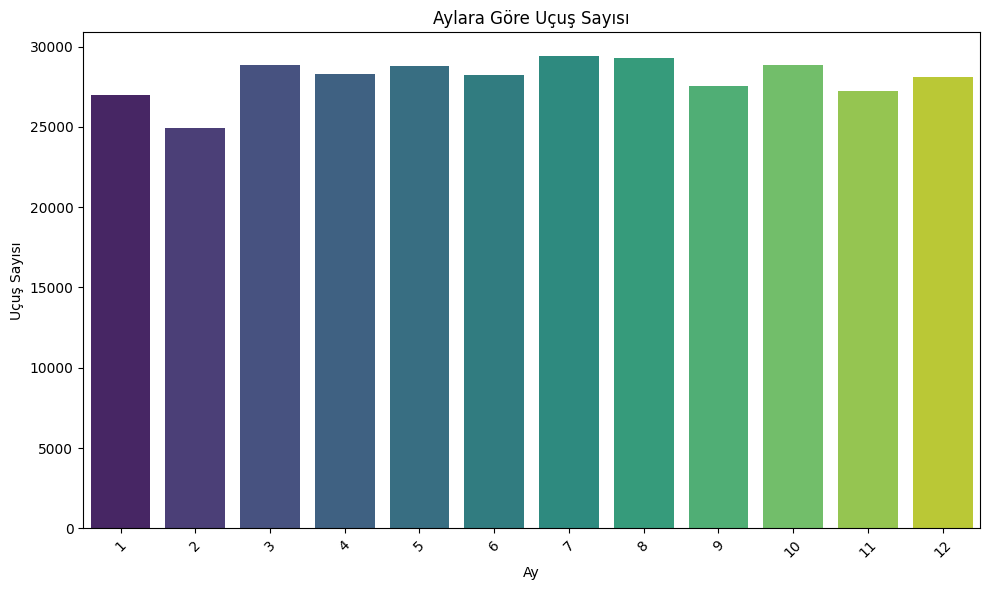

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x="month", data=df, palette="viridis")
plt.title("Aylara Göre Uçuş Sayısı")
plt.xlabel("Ay")
plt.ylabel("Uçuş Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Havayolu Şirketlerine Göre Uçuş Sayısı**

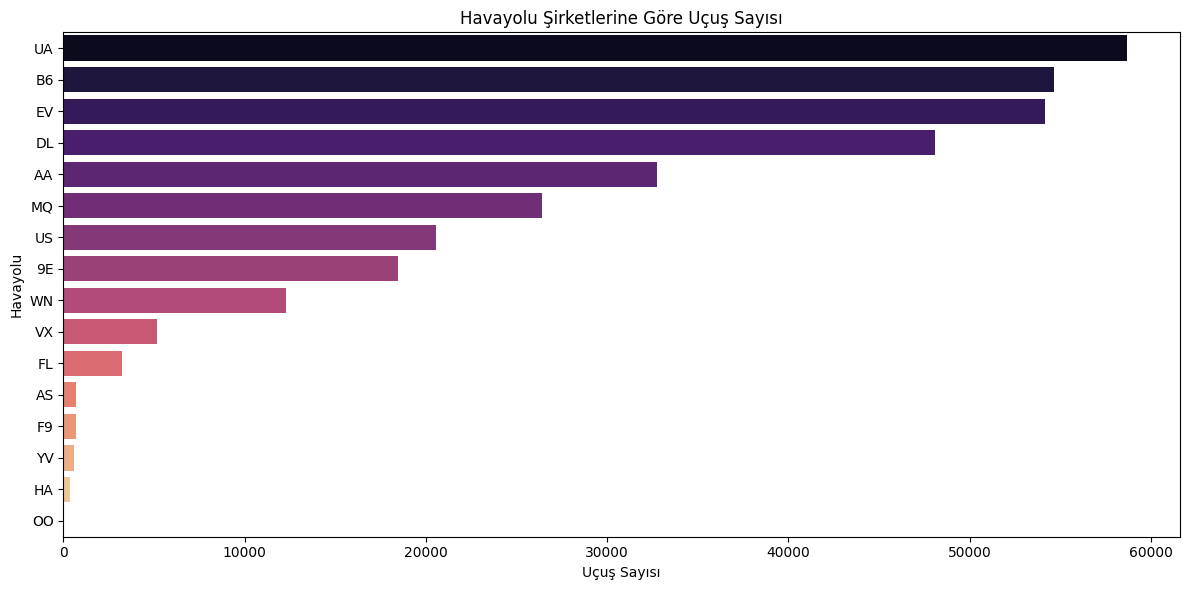

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y="carrier", data=df, order=df["carrier"].value_counts().index, palette="magma")
plt.title("Havayolu Şirketlerine Göre Uçuş Sayısı")
plt.xlabel("Uçuş Sayısı")
plt.ylabel("Havayolu")
plt.tight_layout()
plt.show()


# **Gecikmeli Uçuşların Dağılımı (Kalkış Gecikmesi)**

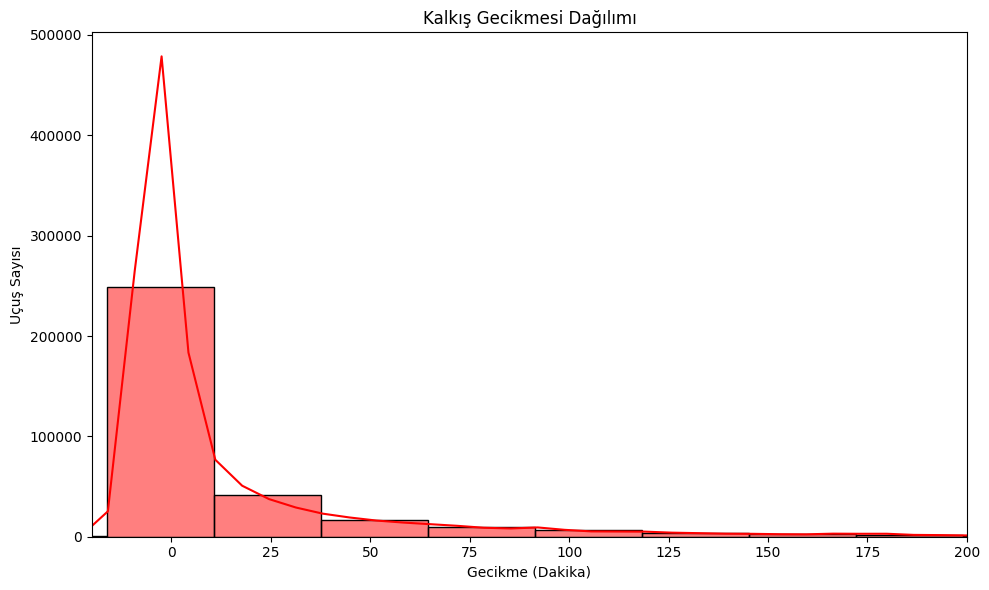

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df["dep_delay"].dropna(), bins=50, kde=True, color="red")
plt.title("Kalkış Gecikmesi Dağılımı")
plt.xlabel("Gecikme (Dakika)")
plt.ylabel("Uçuş Sayısı")
plt.xlim(-20, 200)  # Aykırı değerleri dışarda bırakmak için
plt.tight_layout()
plt.show()

# **Gün Bazında Ortalama Gecikmeler**

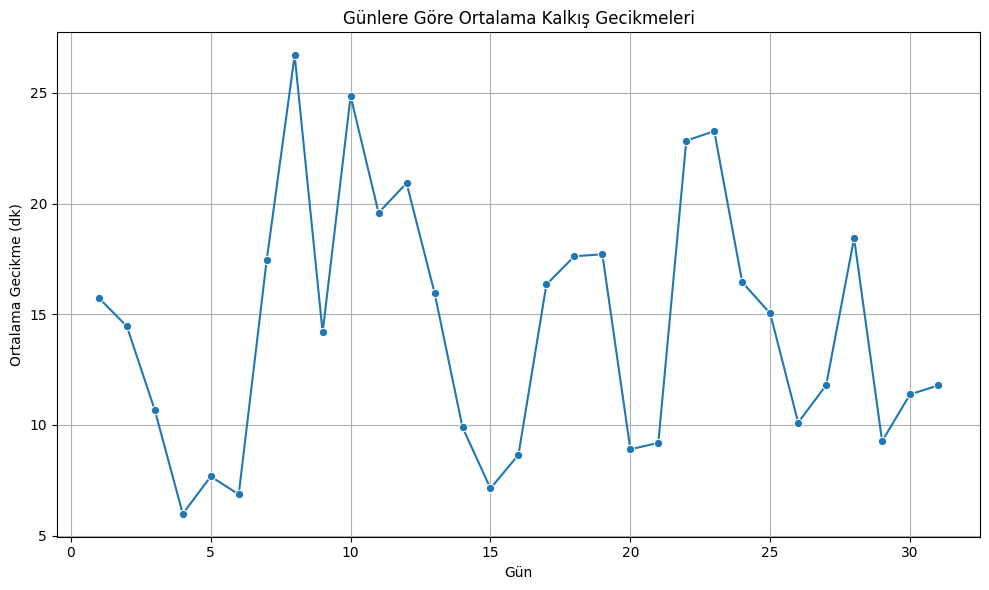

In [22]:
daily_delay = df.groupby("day")["dep_delay"].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_delay.index, y=daily_delay.values, marker="o")
plt.title("Günlere Göre Ortalama Kalkış Gecikmeleri")
plt.xlabel("Gün")
plt.ylabel("Ortalama Gecikme (dk)")
plt.grid(True)
plt.tight_layout()
plt.show()

Model denemek için kütüphaneleri import ettik.

In [23]:
# Klasik model: Random Forest
from sklearn.ensemble import RandomForestRegressor  # Birden çok karar ağacına dayalı regresyon modeli

# Alternatif modeller:
import xgboost as xgb  # XGBoost: Hızlı ve etkili bir boosting algoritması
from sklearn.ensemble import GradientBoostingRegressor  # sklearn içerisindeki boosting algoritması
from lightgbm import LGBMRegressor  # LightGBM: Büyük veri setlerinde verimli çalışan boosting algoritması

In [24]:
# Eğitim verisini Ocak-Eylül olarak ayırıyoruz:
train_df = df[df['month'] <= 9].copy()

# Test verisini Ekim-Aralık olarak ayırıyoruz:
test_df = df[df['month'] > 9].copy()

# Hedef ve özellikleri belirledik
target = 'dep_delay'
features = ['month', 'day', 'hour', 'origin', 'dest', 'distance', 'air_time']

# Kategorik değişkenler var ise get_dummies ile dönüştürelim:
train_X = pd.get_dummies(train_df[features])
test_X = pd.get_dummies(test_df[features])

# Eğitim ve test verilerindeki sütunları eşitleyelim:
train_X, test_X = train_X.align(test_X, join='left', axis=1, fill_value=0)
train_y = train_df[target]


# **3. Model Eğitimi ve Tahmin** 
**a. RandomForestRegressor (Referans Model)** 

In [25]:
# Keras'tan gerekli modülleri içe aktar (Sequential model ve Dense katmanı)
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense

# Boş bir Sequential model oluştur
model = Sequential()

# İlk gizli katman: 128 nöron, giriş boyutu train_X'in özellik sayısı kadar, aktivasyon fonksiyonu ReLU
model.add(Dense(128, input_dim=train_X.shape[1], activation='relu'))

# İkinci gizli katman: 64 nöron, aktivasyon fonksiyonu ReLU
model.add(Dense(64, activation='relu'))

# Çıkış katmanı: 1 nöron (tek bir sayısal değer tahmini için)
model.add(Dense(1))  # çıkış katmanı

# Modeli derle: Kayıp fonksiyonu olarak Ortalama Mutlak Hata (MAE), optimizasyon için Adam kullan
model.compile(loss='mean_absolute_error', optimizer='adam')

# Modeli eğit: eğitim verisi, 10 epoch, batch size 64
model.fit(train_X, train_y, epochs=10, batch_size=64)

# Test verisi üzerinde tahmin yap ve sonuçları test_df'ye 'predicted_nn' sütunu olarak ekle
test_df['predicted_nn'] = model.predict(test_X).flatten()

# Gerçek test değerleri ile tahmin edilen değerler arasındaki MAE'yi hesapla
mae_nn = mean_absolute_error(test_df['dep_delay'], test_df['predicted_nn'])

# Sinir ağı modelinin MAE değerini ekrana yazdır
print("NN MAE:", mae_nn)


2025-05-24 22:28:31.139776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748125711.660761      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748125711.808513      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-24 22:28:55.278206: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 21.5067
Epoch 2/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 21.0220
Epoch 3/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.8820
Epoch 4/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.6924
Epoch 5/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.6443
Epoch 6/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.5322
Epoch 7/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.3764
Epoch 8/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.3040
Epoch 9/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.3546
Epoch 10/10
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 20.1781
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
NN MAE: 16.112755472726082


In [26]:

import pandas as pd
import lightgbm as lgb

# 'year', 'month' ve 'day' sütunlarından datetime formatında yeni 'date' sütunu oluştur
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Eğitim verisini 30 Eylül 2013 tarihine kadar olan verilerle oluştur
train_df = df[df['date'] <= '2013-09-30']

# Test verisini 1 Ekim 2013 ile 31 Aralık 2013 tarihleri arasındaki verilerle oluştur
test_df = df[(df['date'] > '2013-09-30') & (df['date'] <= '2013-12-31')]

# Modelde kullanılacak özellikler (bağımsız değişkenler)
features = ['month', 'day', 'dep_time', 'sched_dep_time', 'hour', 'minute']

# Tahmin edilmek istenen hedef değişken (bağımlı değişken)
target = 'dep_delay'

# Eğitim verisindeki özellikleri ve hedefi ayır
train_X = train_df[features]
train_y = train_df[target]

# Test verisindeki özellikler
test_X = test_df[features]

# LightGBM regresyon modelini oluştur (rastgelelik sabitlenmiş)
lgbm_model = lgb.LGBMRegressor(random_state=42)

# Modeli eğitim verisi ile eğit
lgbm_model.fit(train_X, train_y)

# Test veri çerçevesinin kopyasını oluştur (orijinal veriyi değiştirmemek için)
test_df = test_df.copy()

# Test verisi üzerinde tahmin yap ve sonuçları yeni bir sütun olarak ekle
test_df.loc[:, 'predicted_dep_delay'] = lgbm_model.predict(test_X)

# Tarih, gerçek gecikme süresi ve tahmin edilen gecikme süresini göster
print(test_df[['date', 'dep_delay', 'predicted_dep_delay']].head())



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 252484, number of used features: 6
[LightGBM] [Info] Start training from score 15.847622
            date  dep_delay  predicted_dep_delay
27004 2013-10-01      -13.0            -4.307213
27005 2013-10-01        5.0            -3.909964
27006 2013-10-01       -9.0            -3.813045
27007 2013-10-01       -6.0            -3.813045
27008 2013-10-01       -6.0            -3.813045


In [27]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Gerçek değerler (test setindeki gerçek dep_delay sütunu)
y_true = test_df['dep_delay']

# Model tarafından tahmin edilen değerler
y_pred = test_df['predicted_dep_delay']

# Ortalama Mutlak Hata (MAE) hesapla — tahminlerin gerçeklerden ortalama ne kadar saptığını ölçer
mae = mean_absolute_error(y_true, y_pred)

# Ortalama Kare Hata (MSE) kökünü (RMSE) hesapla — hata sapmalarının karekökü, daha büyük hatalara daha fazla ceza verir
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE değerini ekrana yazdır
print(f"MAE: {mae}")

# RMSE değerini ekrana yazdır
print(f"RMSE: {rmse}")


MAE: 5.178666700296451
RMSE: 13.070224053634886


# **1. Random Forest Regressor**

In [28]:
# Random Forest regresyon modeli için gerekli kütüphaneleri içe aktar
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Random Forest modelini oluştur (100 ağaç, rastgelelik için sabit tohum)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Modeli eğitim verisi üzerinde eğit
rf_model.fit(train_X, train_y)

# Test verisi üzerinde tahmin yap
rf_pred = rf_model.predict(test_X)

# Test verisindeki gerçek değerlerle model tahminleri arasındaki Ortalama Mutlak Hata'yı hesapla ve yazdır
print("Random Forest MAE:", mean_absolute_error(test_df['dep_delay'], rf_pred))

# Test verisindeki gerçek değerlerle model tahminleri arasındaki Karekök Ortalama Kare Hata'yı (RMSE) hesapla ve yazdır
print("Random Forest RMSE:", np.sqrt(mean_squared_error(test_df['dep_delay'], rf_pred)))



Random Forest MAE: 1.349458904759645
Random Forest RMSE: 12.3997459093131


# **2. XGBoost Regressor**

In [29]:
# XGBoost kütüphanesini içe aktar
import xgboost as xgb

# XGBoost regresyon modelini oluştur (100 ağaç, rastgelelik sabit)
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100)

# Modeli eğitim verisi üzerinde eğit
xgb_model.fit(train_X, train_y)

# Test verisi üzerinde tahmin yap
xgb_pred = xgb_model.predict(test_X)

# Gerçek değerlerle tahmin edilen değerler arasındaki Ortalama Mutlak Hata'yı (MAE) hesapla ve yazdır
print("XGBoost MAE:", mean_absolute_error(test_df['dep_delay'], xgb_pred))

# Gerçek değerlerle tahmin edilen değerler arasındaki Karekök Ortalama Kare Hata'yı (RMSE) hesapla ve yazdır
print("XGBoost RMSE:", np.sqrt(mean_squared_error(test_df['dep_delay'], xgb_pred)))



XGBoost MAE: 3.829828628404395
XGBoost RMSE: 14.475787379289741


# **3. CatBoost Regressor**

In [30]:
# CatBoost kütüphanesinden CatBoostRegressor sınıfını içe aktar
from catboost import CatBoostRegressor

# CatBoost regresyon modelini oluştur (100 iterasyon, sessiz modda, rastgelelik sabit)
cat_model = CatBoostRegressor(random_state=42, verbose=0, iterations=100)

# Modeli eğitim verisi üzerinde eğit
cat_model.fit(train_X, train_y)

# Test verisi üzerinde tahmin yap
cat_pred = cat_model.predict(test_X)

# Gerçek ve tahmin edilen değerler arasındaki Ortalama Mutlak Hata'yı (MAE) hesapla ve yazdır
print("CatBoost MAE:", mean_absolute_error(test_df['dep_delay'], cat_pred))

# Gerçek ve tahmin edilen değerler arasındaki Karekök Ortalama Kare Hata'yı (RMSE) hesapla ve yazdır
print("CatBoost RMSE:", np.sqrt(mean_squared_error(test_df['dep_delay'], cat_pred)))


CatBoost MAE: 5.017421471888669
CatBoost RMSE: 15.491546540468613


# **4. Gradient Boosting Regressor (sklearn)**

In [31]:
# Sklearn'den GradientBoostingRegressor sınıfını içe aktar
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting regresyon modelini oluştur (100 ağaç, rastgelelik sabit)
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Modeli eğitim verisi üzerinde eğit
gb_model.fit(train_X, train_y)

# Test verisi üzerinde tahmin yap
gb_pred = gb_model.predict(test_X)

# Gerçek değerler ile tahmin edilen değerler arasındaki Ortalama Mutlak Hata (MAE) hesapla ve yazdır
print("Gradient Boosting MAE:", mean_absolute_error(test_df['dep_delay'], gb_pred))

# Gerçek değerler ile tahmin edilen değerler arasındaki Karekök Ortalama Kare Hata (RMSE) hesapla ve yazdır
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(test_df['dep_delay'], gb_pred)))



Gradient Boosting MAE: 8.083970507792625
Gradient Boosting RMSE: 17.667021600915387


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Random Forest modelini oluştur (rastgelelik sabit)
rf = RandomForestRegressor(random_state=42)

# Modelde denenmek istenen parametrelerin aralıkları/dizileri
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],      # Ağaç sayısı
    'max_depth': [None, 10, 20, 30, 40, 50],       # Maksimum derinlik
    'min_samples_split': [2, 5, 10],                # İç düğüm bölünmesi için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],                  # Yaprak düğümde minimum örnek sayısı
    'max_features': ['auto', 'sqrt', 'log2']        # Özellik seçimi yöntemi
}

# RandomizedSearchCV ile 20 farklı parametre kombinasyonunu 3 katlı çapraz doğrulama ile dene
random_search = RandomizedSearchCV(
    estimator=rf,                     # Model
    param_distributions=param_dist,  # Parametre aralıkları
    n_iter=20,                       # Kaç farklı parametre kombinasyonu denenecek
    cv=3,                            # 3 katlı çapraz doğrulama
    verbose=2,                      # Çalışma sırasında çıktı detay seviyesi
    random_state=42,                 # Rastgelelik sabit
    n_jobs=-1,                      # Tüm işlemciler kullanılacak
    scoring='neg_mean_absolute_error'  # Optimize edilecek metrik (negatif MAE)
)

# Parametre araması ile modeli eğit
random_search.fit(train_X, train_y)

# En iyi bulunan parametreleri yazdır
print("Best parameters:", random_search.best_params_)

# En iyi modeli al
best_rf = random_search.best_estimator_

# Test verisi üzerinde tahmin yap
rf_pred = best_rf.predict(test_X)

# Test seti için Ortalama Mutlak Hata hesapla
mae = mean_absolute_error(test_df['dep_delay'], rf_pred)

# Test seti için Karekök Ortalama Kare Hata hesapla
rmse = np.sqrt(mean_squared_error(test_df['dep_delay'], rf_pred))

# Performans sonuçlarını yazdır
print(f"Optimized Random Forest MAE: {mae}")
print(f"Optimized Random Forest RMSE: {rmse}")



Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  36.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  35.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 2.4min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.0min
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  35.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 2.4min
[CV] END max_depth=10, max_features

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.3min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.2min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 1.4min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.2min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 1.4min
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.3min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.2min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time= 7.7min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 1.8min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 3.1min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 3.5min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.1min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.0min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=30, max_features=

In [33]:
# Sadece 1 Ekim - 31 Aralık arası filtreleme
tahminler = test_df[(test_df['date'] >= '2013-10-01') & (test_df['date'] <= '2013-12-31')]

# Gerekli sütunları göster (gözlem + tahmin)
print(tahminler[['date', 'dep_delay', 'predicted_dep_delay']].head(20))  # ilk 20 satır


            date  dep_delay  predicted_dep_delay
27004 2013-10-01      -13.0            -4.307213
27005 2013-10-01        5.0            -3.909964
27006 2013-10-01       -9.0            -3.813045
27007 2013-10-01       -6.0            -3.813045
27008 2013-10-01       -6.0            -3.813045
27009 2013-10-01       -6.0            -2.455087
27010 2013-10-01      -11.0            -5.719448
27011 2013-10-01      -10.0            -5.719448
27012 2013-10-01      -10.0            -5.719448
27013 2013-10-01       -9.0            -5.719448
27014 2013-10-01       -9.0            -5.719448
27015 2013-10-01       -9.0            -5.719448
27016 2013-10-01       -8.0            -5.719448
27017 2013-10-01       -7.0            -5.719448
27018 2013-10-01       -7.0            -5.719448
27019 2013-10-01       -6.0            -5.719448
27020 2013-10-01       -6.0            -5.719448
27021 2013-10-01       -5.0            -5.719448
27022 2013-10-01       -4.0            -3.848770
27023 2013-10-01    